# Analisis del campo 'banos'

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import common.common_pandas_lib as common

## Configuraciones

### Configuraciones librerias y plots

In [2]:
COLORES_BARRAS = 'colorblind'
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
sns.set_palette(COLORES_BARRAS)
    
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs



## Carga optimizada del set de datos

In [3]:
zona_prop = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                'tipodepropiedad' : 'category', \
                'provincia' : 'category', \
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Banos 

### ¿Que es banos? 

In [4]:
zona_prop['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [5]:
zona_prop['banos'].dtype

dtype('float16')

### ¿Cuantos datos tiene el campo bano limpio? 

In [6]:
cant_banos_nan = zona_prop['banos'].isnull().sum()
cant_banos_nan

26221

### ¿Cuantos datos perdemos si descartamos todos los banos nan? 

In [7]:
cant_banos_nan / zona_prop.shape[0]

0.10925416666666667

Perdemos aprox. el 11 % de los datos del set. 

In [8]:
zona_banos = zona_prop.copy()
zona_banos = zona_banos.dropna(subset = ['banos'])
zona_banos['banos'].isnull().sum()

0

Ahora podemos convertir la columna de baños a int, pues los valores decimales no nos importan

In [9]:
zona_banos['banos'] = zona_banos['banos'].astype(np.int8) 
zona_banos['banos'].dtype

dtype('int8')

### ¿Cual es la distribucion de propiedades segun la cantidad de baños? 

In [10]:
banos_agrupados_cantidad = zona_banos.groupby(['banos']).agg({'banos' : ['count']})
banos_agrupados_cantidad.columns = banos_agrupados_cantidad.columns.get_level_values(0) \
                                    + '_' + \
                                    banos_agrupados_cantidad.columns.get_level_values(1)
banos_agrupados_cantidad.reset_index(inplace = True)
banos_agrupados_cantidad

,banos,banos_count
0,1,58173
1,2,87683
2,3,49365
3,4,18558


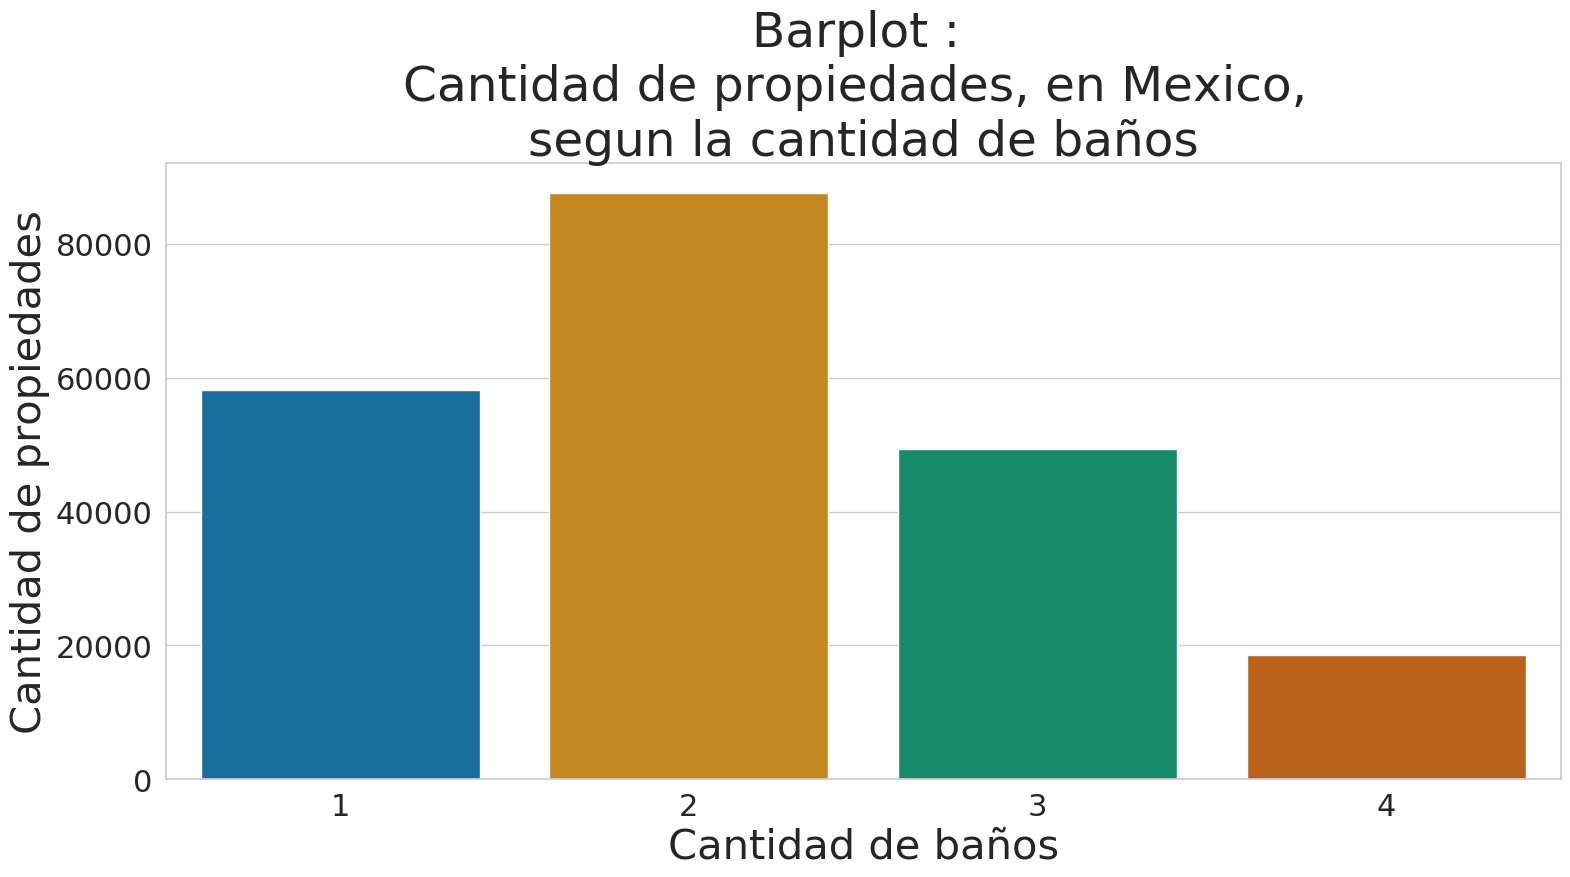

In [11]:
plot_banos_cantidad = sns.barplot(
                        x  = 'banos',
                        y = 'banos_count',
                        data = banos_agrupados_cantidad
                    )
common.setear_titulos_plot(
    plot_banos_cantidad,
    'Barplot : \nCantidad de propiedades, en Mexico, \nsegun la cantidad de baños',
    'Cantidad de baños',
    'Cantidad de propiedades'
)


plt.show()

Vemos que la mayor parte de las propiedades tiene solo 2 baños

## Banos - Antiguedad 

### ¿Que es antiguedad?

In [12]:
zona_banos['antiguedad'].unique()

array([nan, 10.,  5.,  1.,  2.,  0.,  4.,  8.,  3., 18., 20., 16.,  6.,
       50., 30., 26., 25., 28., 15., 12., 48., 22., 11., 60., 17., 33.,
       35., 14., 40.,  7.,  9., 27., 24., 19., 34., 13., 37., 36., 31.,
       21., 23., 45., 32., 51., 29., 42., 43., 70., 44., 65., 46., 39.,
       38., 47., 63., 55., 52., 41., 80., 59., 67., 54., 49., 58., 75.,
       53., 79., 69., 56., 61., 57., 66., 64., 74., 62., 68.])

In [13]:
zona_banos['antiguedad'].dtype

dtype('float16')

### ¿Cuantas antiguedad son NaN?

In [14]:
cant_antiguedad_nan = zona_banos['antiguedad'].isnull().sum()
cant_antiguedad_nan

33528

### ¿Cuantos datos perdemos si descartamas antiguedad NaN tambien?

In [15]:
(cant_banos_nan + cant_antiguedad_nan) / zona_prop.shape[0]

0.24895416666666667

Perdemos aprox. el 25 % de los datos totales.

In [16]:
zona_banos_antiguedad = zona_banos.dropna(subset = ['antiguedad'])
zona_banos_antiguedad['antiguedad'].isnull().sum()

0

In [17]:
zona_banos_antiguedad = zona_banos_antiguedad.copy()
zona_banos_antiguedad['antiguedad'] = zona_banos_antiguedad['antiguedad'].astype(np.int16) 
# Para evitar overflows en el tipo al realizar operaciones, usamos un tipo 
# con mas bits de los necesarios, pero el minimo de ellos
zona_banos_antiguedad['antiguedad'].dtype

dtype('int16')

### ¿Cual es el porcentaje de propiedades, en Mexico, segun la cantidad de baños y su antiguedad? 

In [18]:
banos_agrupados_antiguedad_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos_antiguedad, 'banos', 'antiguedad')
banos_agrupados_antiguedad_porcentaje.columns = ['banos', 'antiguedad', 'porcentaje_propiedades']
banos_antiguedad_porcentaje_pivot = banos_agrupados_antiguedad_porcentaje.pivot_table(index = 'antiguedad', columns = 'banos', values = 'porcentaje_propiedades')
banos_antiguedad_porcentaje_pivot.fillna(0, inplace = True)
banos_antiguedad_porcentaje_pivot

banos,1,2,3,4
antiguedad,,,,
0,15.76,26.81,27.82,30.61
1,4.23,6.91,7.11,7.83
2,1.82,3.01,2.86,2.86
3,2.33,3.25,3.15,3.07
4,3.79,4.39,4.18,4.17
5,21.12,17.11,14.95,13.64
6,1.68,1.64,1.65,1.62
7,1.22,1.06,1.02,0.91
8,1.47,1.24,1.20,1.05


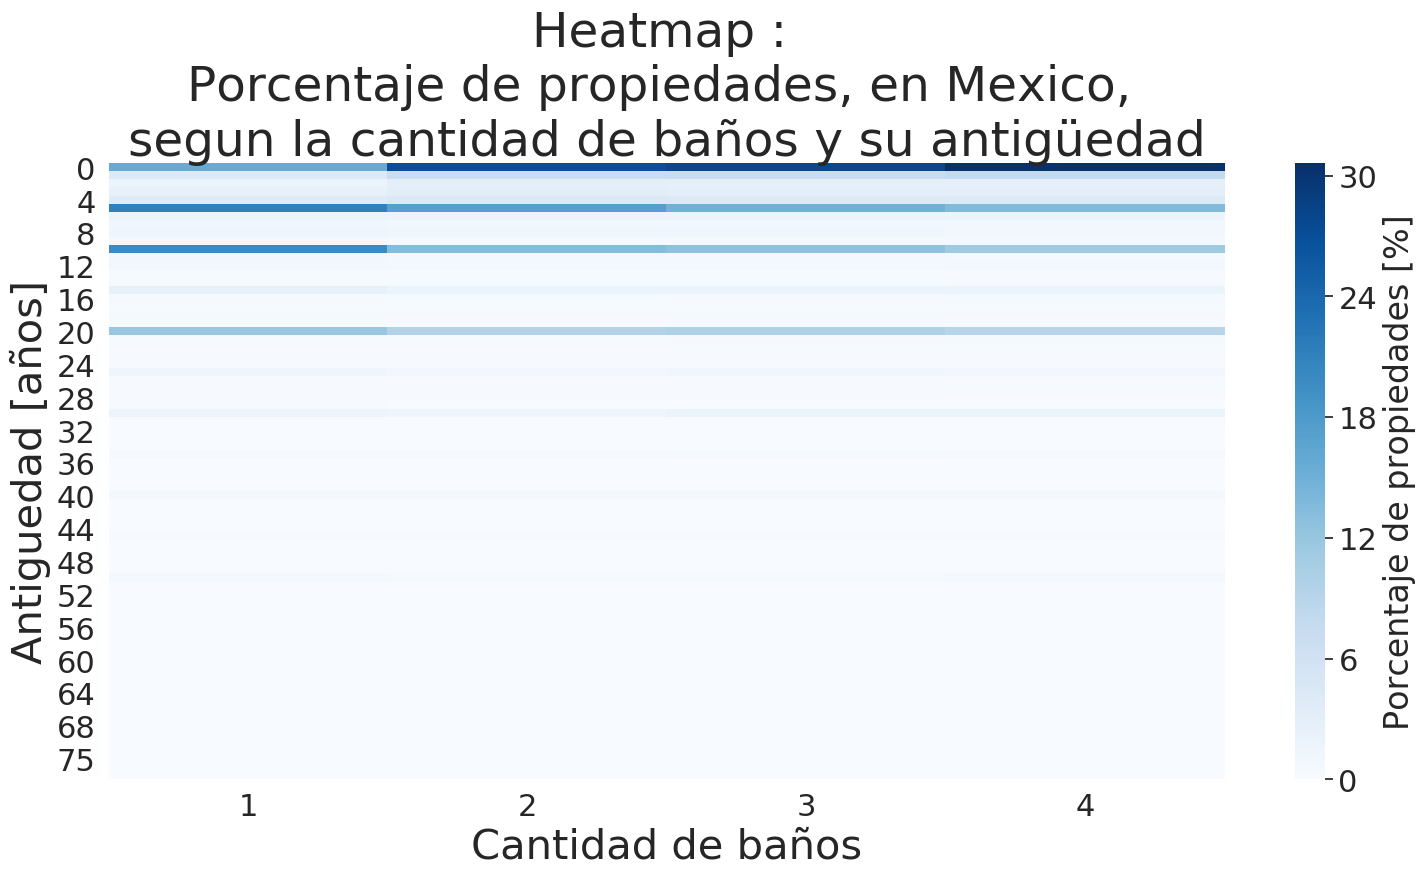

In [19]:
plot_heatmap_banos_antiguedad_porcentaje = sns.heatmap(
                                                banos_antiguedad_porcentaje_pivot,
                                                cmap = 'Blues',
                                                cbar_kws={'label': 'Porcentaje de propiedades [%]'}
                                            )
common.setear_titulos_plot(
    plot_heatmap_banos_antiguedad_porcentaje,
    'Heatmap : \nPorcentaje de propiedades, en Mexico, \nsegun la cantidad de baños y su antigüedad',
    'Cantidad de baños',
    'Antiguedad [años]'
)

plt.show()

#### ¿Cuales son la antiguedad de propiedades, en Mexico, que abarcan un porcentaje mayor a 10%, segun la cantidad de baños ? 

In [20]:
banos_antiguedad_porcentaje = banos_antiguedad_porcentaje_pivot.unstack().to_frame().reset_index()
banos_antiguedad_porcentaje.columns = ['banos', 'antiguedad', 'porcentaje_propiedades']
banos_antiguedad_porcentaje_mayor_10 = banos_antiguedad_porcentaje.loc[banos_antiguedad_porcentaje['porcentaje_propiedades'] > 10]
banos_antiguedad_porcentaje_mayor_10_pivot = banos_antiguedad_porcentaje_mayor_10.pivot_table(index = 'antiguedad', columns = 'banos', values = 'porcentaje_propiedades')
banos_antiguedad_porcentaje_mayor_10_pivot.fillna(0, inplace = True)
banos_antiguedad_porcentaje_mayor_10_pivot

banos,1,2,3,4
antiguedad,,,,
0,15.76,26.81,27.82,30.61
5,21.12,17.11,14.95,13.64
10,19.96,13.41,12.78,11.48
20,11.87,0.00,0.00,0.00


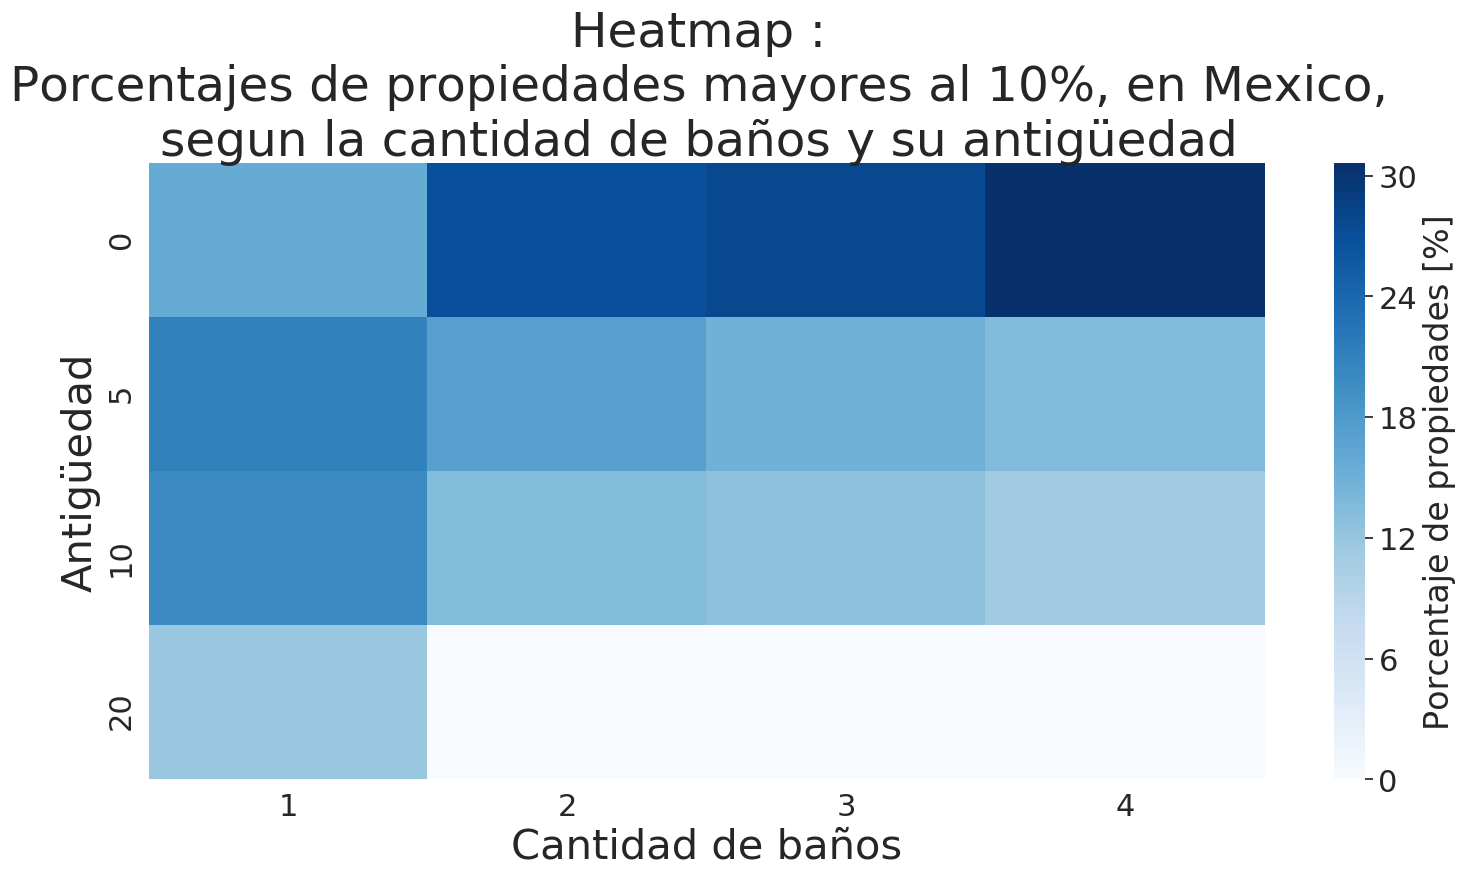

In [21]:
plot_heatmap_banos_antiguedad_porcentaje_mayor_10 = sns.heatmap(
                                                        banos_antiguedad_porcentaje_mayor_10_pivot,
                                                        cmap = 'Blues',
                                                        cbar_kws={'label': 'Porcentaje de propiedades [%]'}
                                                    )
common.setear_titulos_plot(
    plot_heatmap_banos_antiguedad_porcentaje_mayor_10,
    'Heatmap : \nPorcentajes de propiedades mayores al 10%, en Mexico, \nsegun la cantidad de baños y su antigüedad ',
    'Cantidad de baños',
    'Antigüedad'
)

plt.show()

## Banos - Metroscubiertos 

### ¿Que es metros cubiertos?

In [22]:
zona_banos['metroscubiertos'].unique()

array([ 80., 268., 144.,  63.,  95.,  75., 140., 293.,  58., 100., 256.,
       170., 250., 180., 210., 133., 181., 179., 280., 258., 150.,  40.,
        nan,  88., 143., 292., 346., 300., 303., 146.,  78.,  84.,  90.,
       262., 156., 160.,  68.,  98.,  47.,  57., 285.,  79., 175., 340.,
        61., 167., 220., 405.,  46., 350., 355.,  71.,  76., 122., 108.,
       247.,  89., 228., 396., 264., 367., 164., 130.,  39., 161., 216.,
        83., 385., 196., 120., 171., 141., 106., 254.,  86.,  55., 135.,
       277., 110., 115., 177.,  70., 430., 189., 111.,  51., 155.,  65.,
       225., 265.,  60., 102.,  49., 138., 270., 278., 131., 208., 245.,
       269., 154., 125., 295., 211., 188., 230.,  66., 310., 113., 330.,
       226., 233.,  96.,  59.,  54., 152., 360., 195., 173., 234.,  53.,
       201., 193., 117., 351., 145.,  72., 260., 139.,  62., 198., 127.,
       206.,  77., 322., 417., 192.,  64.,  97., 382., 222.,  94., 137.,
       183., 246., 199., 153., 128., 147., 271., 10

### ¿Cuantos metroscubiertos del set restante estan limpios? 

In [23]:
cant_banos_no_nan_metroscubiertos_nan = zona_banos['metroscubiertos'].isnull().sum()
cant_banos_no_nan_metroscubiertos_nan

6604

### ¿Cuantos datos perdemos si descartamos metroscubiertos NaN? 

In [24]:
(cant_banos_nan + cant_banos_no_nan_metroscubiertos_nan) / zona_prop.shape[0]

0.13677083333333334

Perdemos aprox. el 14 % de los datos del set.

In [25]:
zona_banos_metroscubiertos = zona_banos.dropna(subset = ['metroscubiertos'])
zona_banos_metroscubiertos['metroscubiertos'].isnull().sum()

0

### ¿Cual es la distribuciones de metros cubiertos de las propiedades, en Mexico, segun la cantidad de banos? 

In [26]:
banos_agrupados_metroscubiertos_estadisticas = common.agrupar_calcular_estadisticas_desagrupar(zona_banos, 'banos', 'metroscubiertos')
banos_agrupados_metroscubiertos_estadisticas

,banos,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3
0,1,60.00,73.00,99.00
1,2,106.00,145.00,198.00
2,3,180.00,232.00,300.00
3,4,237.00,295.00,350.00


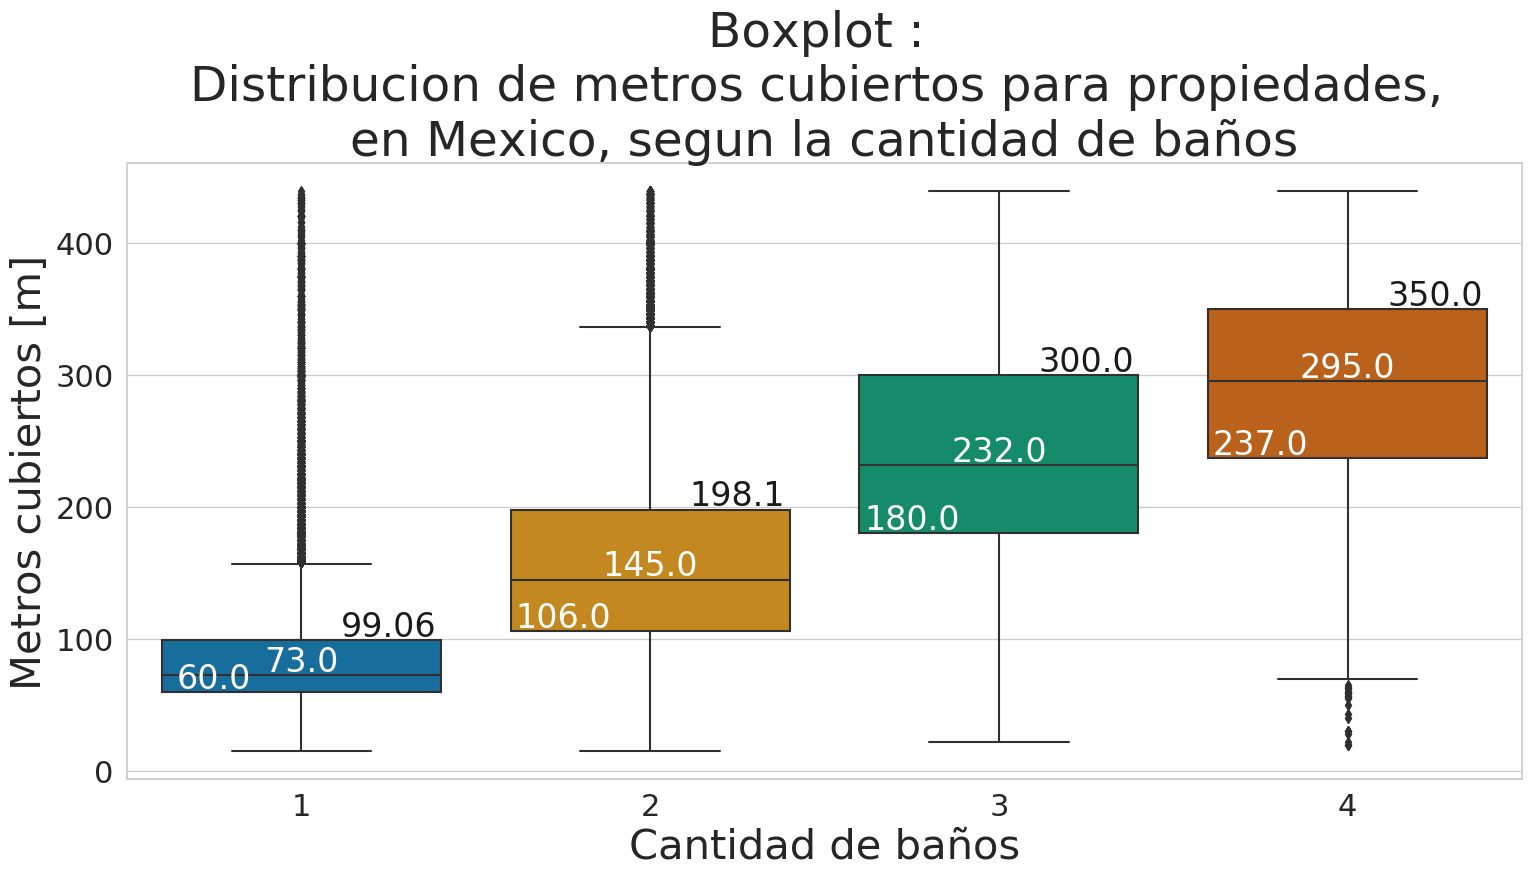

In [27]:
plot_boxplot_banos_metroscubiertos = sns.boxplot(
                                            x = 'banos',
                                            y = 'metroscubiertos',
                                            data = zona_banos_metroscubiertos
                                        )

# Titulos
common.setear_titulos_plot(
    plot_boxplot_banos_metroscubiertos,
    'Boxplot : \nDistribucion de metros cubiertos para propiedades, \nen Mexico, segun la cantidad de baños',
    'Cantidad de baños',
    'Metros cubiertos [m]'
)

# Agrego cuantiles y medianas
common.agregar_serie_plot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    'w',
    -0.25, 3
)

common.agregar_serie_plot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    'w',
    0, 3
)

common.agregar_serie_plot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    'k',
    0.25, 3
)

plt.show()

Vemos que la cantidad de metros cubiertos para propiedades de un solo baño varia poco.  
Por otro lado propieadades con 3 o 4 baños tienen mas variacion mayor en los metros cubiertos.

## Banos - Metrostotales

### ¿Que ese metrostotales?

In [28]:
zona_banos['metrostotales'].unique()

array([ 80., 180., 166.,  67.,  95.,  90., 160., 293.,  nan, 141., 231.,
       250., 275., 184., 150., 224., 260.,  98.,  66., 306., 196., 355.,
       300., 350., 216., 145., 200., 100., 170.,  84., 110.,  70., 140.,
       128., 233.,  68.,  47., 190.,  61., 167., 132.,  64., 385., 340.,
       215., 330., 122., 204., 120., 135., 210., 183., 325., 163.,  39.,
       191.,  83., 408., 121., 400., 144.,  75.,  96., 178.,  86.,  60.,
        85., 220.,  50., 153., 189., 421., 125., 151., 105., 155., 257.,
       256., 168., 268., 349., 126.,  49., 112., 273., 130., 198., 131.,
       115., 248.,  88., 246., 113., 304., 394., 154.,  59.,  63., 208.,
        58., 244., 117., 127.,  53., 226., 108., 146., 309., 415.,  72.,
       240.,  55., 420., 107.,  71., 367., 197., 138., 230., 142.,  97.,
        89., 320., 162., 290., 137., 251., 119., 123., 136., 271., 158.,
        74., 109., 390.,  65.,  30., 302., 218., 214., 313., 102.,  99.,
       104.,  62., 249., 243., 165., 169., 195., 19

In [29]:
zona_banos['metrostotales'].dtype

dtype('float16')

### ¿Cuantos metrostotales son NaN?

In [30]:
cant_metrostotales_nan = zona_banos['metrostotales'].isnull().sum()
cant_metrostotales_nan

46376

### ¿Cuantos datos perdemos si descartamos tambien metrostotales NaN?

In [31]:
(cant_banos_nan + cant_metrostotales_nan) / zona_prop.shape[0]

0.3024875

Perdemos aprox. el 30 % de los datos.

In [32]:
zona_banos_metrostotales = zona_banos.copy()
zona_banos_metrostotales = zona_banos_metrostotales.dropna(subset = ['metrostotales'])
zona_banos_metrostotales['metrostotales'].isnull().sum()

0

### ¿Cual es la distribucion de metros totales de las propiedades, en Mexico, segun la cantidad de baños?

In [33]:
banos_agrupados_metrostotales_estadisticas = common.agrupar_calcular_estadisticas_desagrupar(zona_banos, 'banos', 'metrostotales')
banos_agrupados_metrostotales_estadisticas

,banos,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
0,1,66.00,90.00,124.00
1,2,106.00,142.00,200.00
2,3,152.00,203.00,284.00
3,4,190.00,250.00,320.00


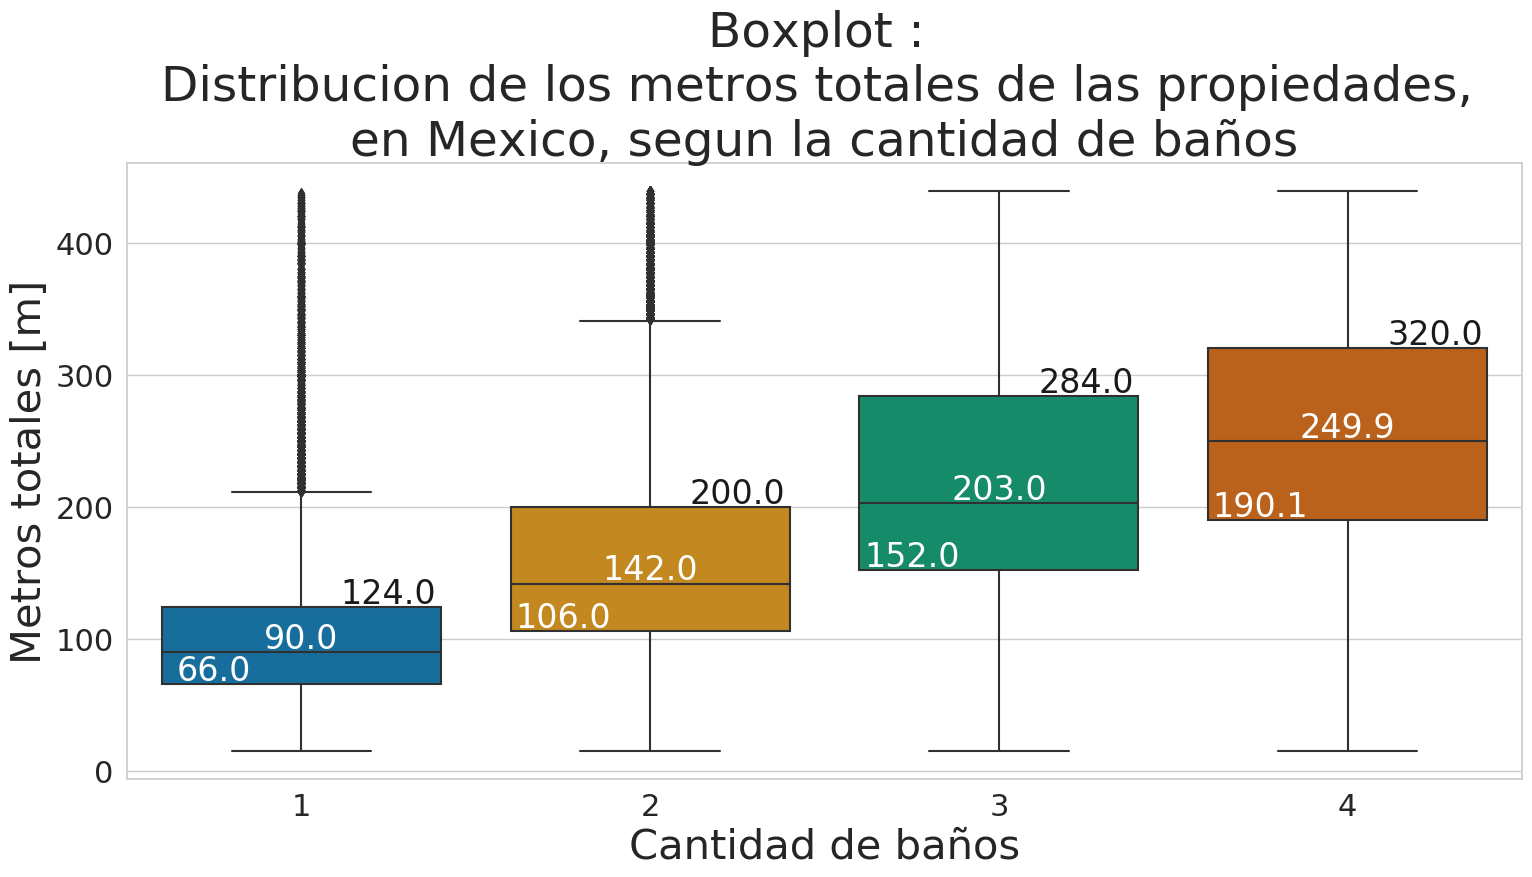

In [34]:
plot_boxplot_banos_metrostotales = sns.boxplot(
                                        x = 'banos',
                                        y = 'metrostotales',
                                        data = zona_banos_metrostotales
                                    )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_banos_metrostotales,
    'Boxplot : \nDistribucion de los metros totales de las propiedades, \nen Mexico, segun la cantidad de baños',
    'Cantidad de baños',
    'Metros totales [m]'
)

# Agrego cuantiles y medianas
common.agregar_serie_plot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'],
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'],
    'w',
    -0.25, 3
)

common.agregar_serie_plot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_median'],
    banos_agrupados_metrostotales_estadisticas['metrostotales_median'],
    'w',
    0, 3
)

common.agregar_serie_plot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'],
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'],
    'k',
    0.25, 3
)

plt.show()

Al igual que en el boxplot banos-metroscubiertos, las propiedades con 1 baño varian poco en metros totales ocupados.  
De la misma, manera, a medida que aumento la cantidad de baños, tambien aumenta la "varianza" de metrostotales de la estas propiedades.

## Baños - Fecha

TODO : Podriamos hacer un grafico para ver la evolucion de los precios con respecto al avance de los meses en un año.

### ¿Que es fecha? 

In [35]:
zona_banos['fecha'].unique()

array(['2015-08-23T00:00:00.000000000', '2013-06-28T00:00:00.000000000',
       '2015-10-17T00:00:00.000000000', ...,
       '2012-12-30T00:00:00.000000000', '2014-08-31T18:12:16.000000000',
       '2014-09-30T18:12:16.000000000'], dtype='datetime64[ns]')

In [36]:
zona_banos['fecha'].dtype

dtype('<M8[ns]')

### ¿Cuantas fecha son NaN? 

In [37]:
zona_banos['fecha'].isnull().sum()

0

No perdemos mas datos.

In [38]:
zona_banos['anio'] = zona_banos['fecha'].dt.year
zona_banos

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00",2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00",2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00",2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00",2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00",2016
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00",2014
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00",2016
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,...,20.67,-87.04,2016-10-20,False,False,False,False,False,"4,200,000.00",2016
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,nan,nan,2014-01-06,False,False,False,True,True,"310,000.00",2014
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.00,3.00,1.00,...,22.20,-101.02,2013-01-03,False,False,False,True,True,"488,000.00",2013


### ¿Como evoluciono el porcentaje de propiedades, en Mexico, segun la cantidad de baños, por año? 

In [39]:
anio_agrupado_banos_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos,'anio', 'banos')
anio_agrupado_banos_porcentaje.columns = ['anio', 'banos', 'porcentaje_propiedades']
anio_agrupado_banos_porcentaje

,anio,banos,porcentaje_propiedades
0,2012,2,40.65
1,2012,1,31.29
2,2012,3,21.02
3,2012,4,7.04
4,2013,2,41.33
5,2013,1,30.82
6,2013,3,20.86
7,2013,4,6.99
8,2014,2,40.67
9,2014,1,27.76


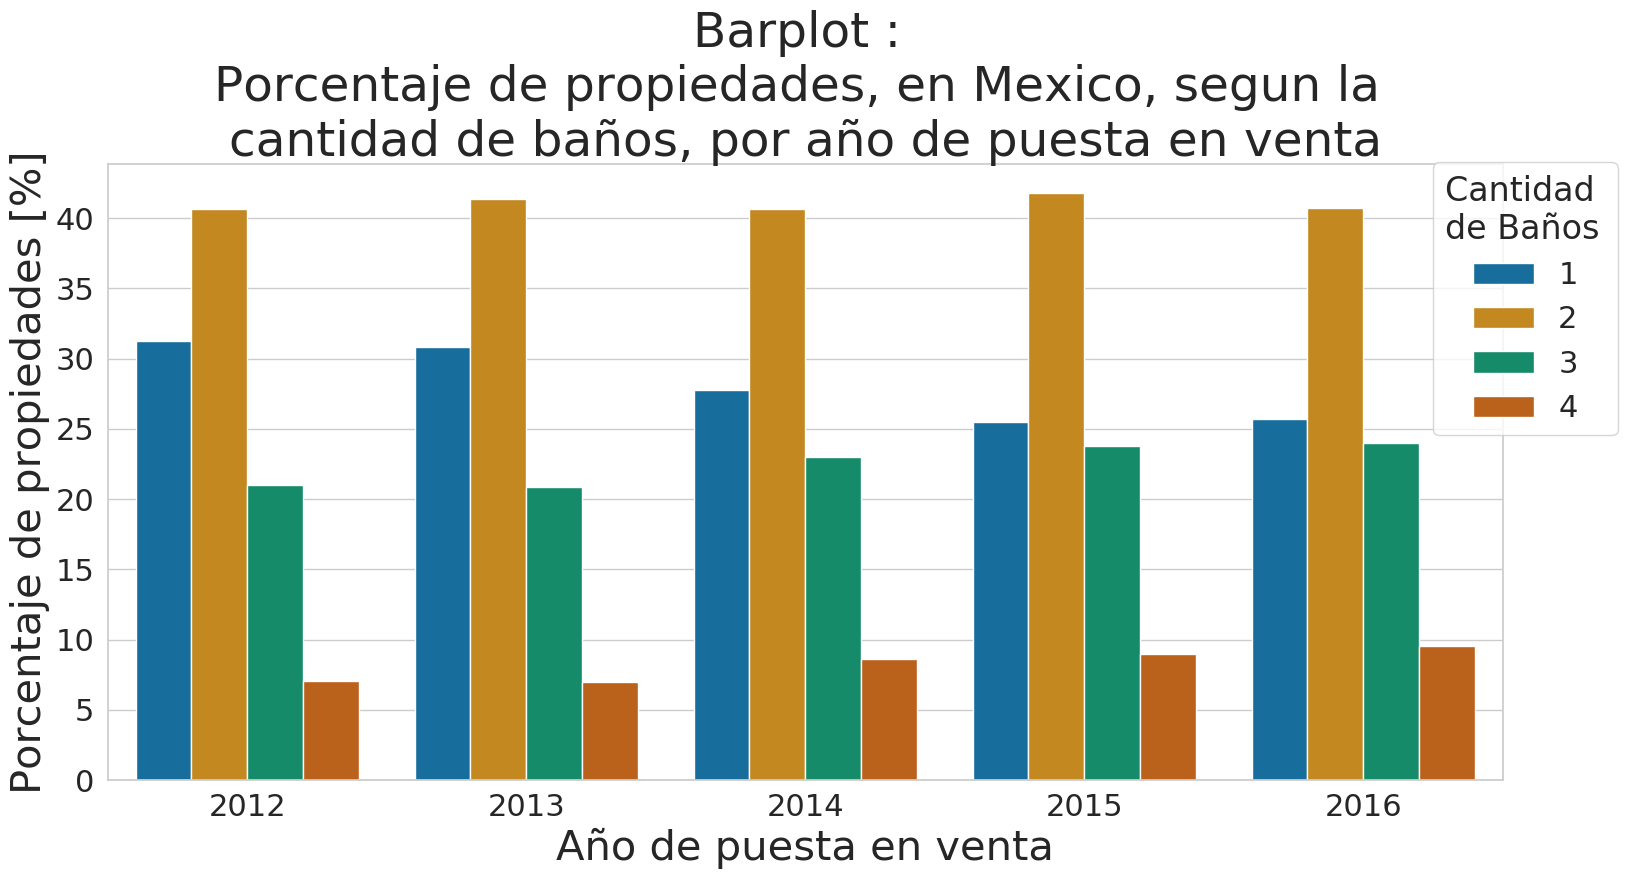

In [40]:
plot_barplot_anio_banos_porcentaje = sns.barplot(
                                        x = 'anio',
                                        y = 'porcentaje_propiedades',
                                        hue = 'banos',
                                        data = anio_agrupado_banos_porcentaje
                                    )
common.setear_titulos_plot(
    plot_barplot_anio_banos_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños, por año de puesta en venta',
    'Año de puesta en venta',
    'Porcentaje de propiedades [%]'
)

plot_barplot_anio_banos_porcentaje.legend(
    title = 'Cantidad \nde Baños',
    loc = [0.95, 0.56]
)
plt.show()

In [41]:
anio_banos_porcentaje_pivot = anio_agrupado_banos_porcentaje.pivot_table(index = 'banos', columns = 'anio', values = 'porcentaje_propiedades')
anio_banos_porcentaje_pivot

anio,2012,2013,2014,2015,2016
banos,,,,,
1,31.29,30.82,27.76,25.48,25.71
2,40.65,41.33,40.67,41.76,40.75
3,21.02,20.86,22.97,23.78,24.02
4,7.04,6.99,8.60,8.97,9.53


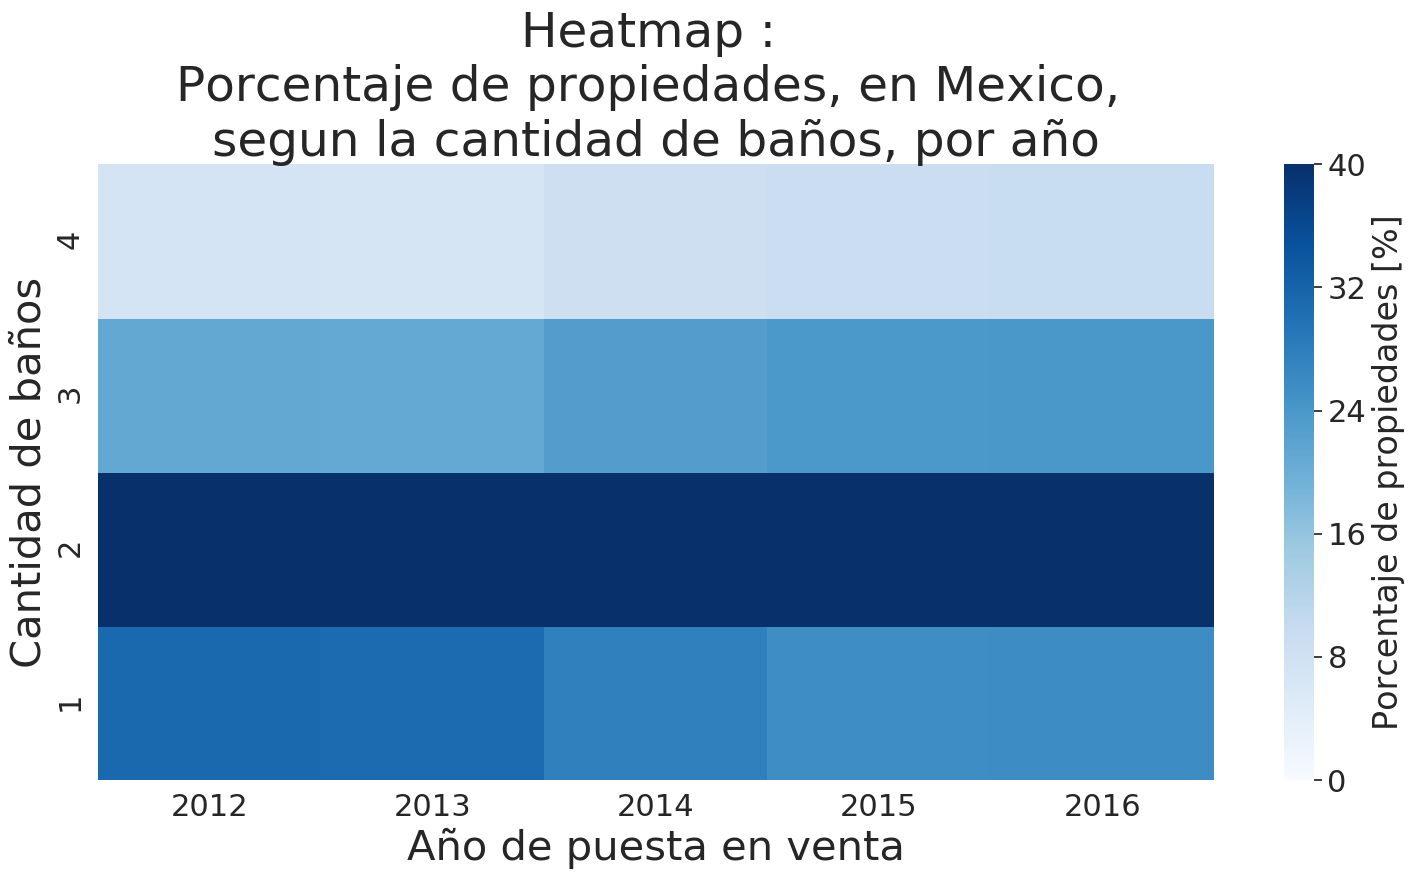

In [42]:
plot_heatmap_banos_anio_porcentaje = sns.heatmap(
                                        anio_banos_porcentaje_pivot,
                                        cmap = 'Blues',
                                        vmin = 0,
                                        vmax = 40,
                                        cbar_kws={'label': 'Porcentaje de propiedades [%]'}
                                    )
plot_heatmap_banos_anio_porcentaje.invert_yaxis()

common.setear_titulos_plot(
    plot_heatmap_banos_anio_porcentaje,
    'Heatmap : \nPorcentaje de propiedades, en Mexico, \nsegun la cantidad de baños, por año',
    'Año de puesta en venta',
    'Cantidad de baños'
)

plt.show()

Otra forma de visualizar la misma informacion que en el grafico de barras.

#### ¿Y en forma de barras apiladas? 

In [43]:
anio_banos_porcentaje_pivot_apilados = anio_banos_porcentaje_pivot.cumsum()
anio_banos_porcentaje_pivot_apilados

anio,2012,2013,2014,2015,2016
banos,,,,,
1,31.29,30.82,27.76,25.48,25.71
2,71.94,72.15,68.43,67.24,66.46
3,92.96,93.01,91.40,91.03,90.47
4,100.00,100.00,100.00,100.00,100.00


In [112]:
sns.color_palette(COLORES_BARRAS).as_hex()[1]

'#de8f05'

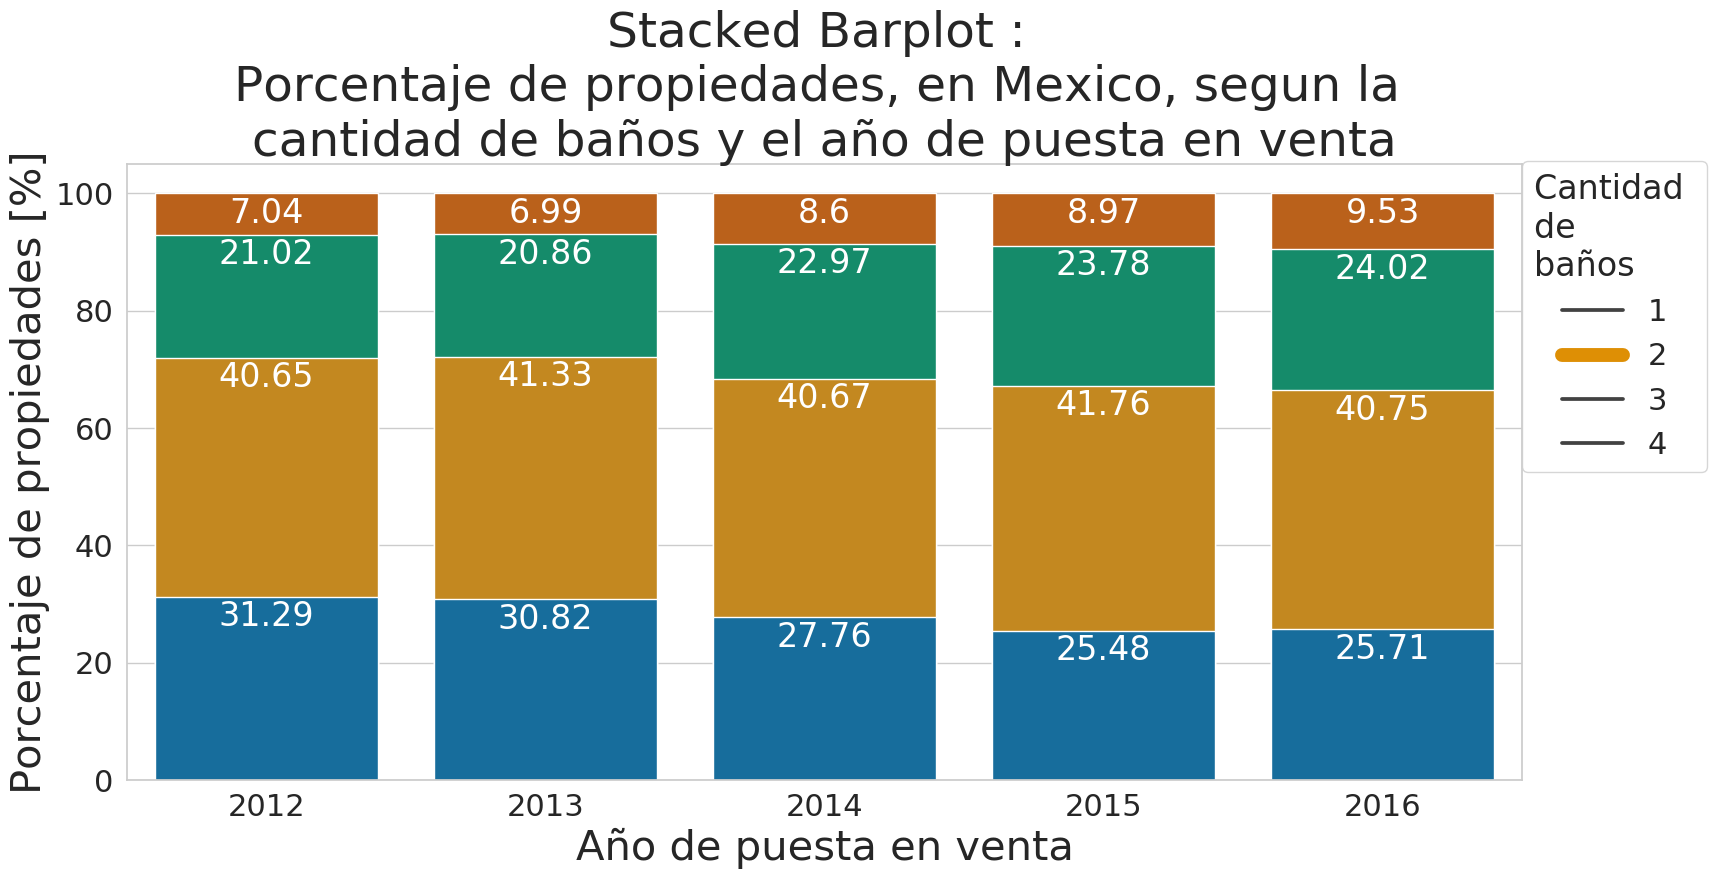

In [137]:
varios_plots_anio_bano_porcentaje_apilados = common.plot_stacked_barplot(anio_banos_porcentaje_pivot_apilados) 

# Titulos 
common.setear_titulos_plot(
    varios_plots_anio_bano_porcentaje_apilados[-1],
    'Stacked Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños y el año de puesta en venta',
    'Año de puesta en venta',
    'Porcentaje de propiedades [%]'
)

# Agregar porcentajes

common.agregar_valores_stacked_barplot(
    varios_plots_anio_bano_porcentaje_apilados,
    anio_banos_porcentaje_pivot_apilados,
    'w',
    0, -5
)

plt.legend(varios_plots_anio_bano_porcentaje_apilados)
legenda = plt.legend([1,2,3,4], title = 'Cantidad \nde \nbaños', loc = [1, 0.5])
legenda.legendHandles[1].set_color('#de8f05')
legenda.legendHandles[1].set_lw(10)
plt.show()

In [128]:
ax_1 = varios_plots_anio_bano_porcentaje_apilados[0]
ax_1.

## Banos - Gimnasio

### ¿Que es gimnasio? 

In [45]:
zona_banos['gimnasio'].unique()

array([False,  True])

In [46]:
zona_banos['gimnasio'].dtype

dtype('bool')

### ¿Cuantos gimnasio son NaN? 

In [47]:
zona_banos['gimnasio'].isnull().sum()

0

No perdemos ningun otro dato.

### ¿Cual es el porcentaje de propiedade, en Mexico, segun la cantidad de baños y la presencia de gimnasio?

In [48]:
banos_agrupados_gimnasio_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos, 'banos', 'gimnasio')
banos_agrupados_gimnasio_porcentaje.columns = ['banos', 'tiene_gimnasio', 'porcentaje_propiedades']
banos_agrupados_gimnasio_porcentaje

,banos,tiene_gimnasio,porcentaje_propiedades
0,1,False,97.00
1,1,True,3.00
2,2,False,92.55
3,2,True,7.45
4,3,False,90.86
5,3,True,9.14
6,4,False,91.35
7,4,True,8.65


In [49]:
banos_gimnasio_porcentaje_para_plot = banos_agrupados_gimnasio_porcentaje.copy()
banos_gimnasio_porcentaje_para_plot = common.columna_bool_a_si_no(
                                        banos_gimnasio_porcentaje_para_plot, 
                                        'tiene_gimnasio'
                                    )
banos_gimnasio_porcentaje_para_plot

,banos,tiene_gimnasio,porcentaje_propiedades
0,1,No,97.00
1,1,Si,3.00
2,2,No,92.55
3,2,Si,7.45
4,3,No,90.86
5,3,Si,9.14
6,4,No,91.35
7,4,Si,8.65


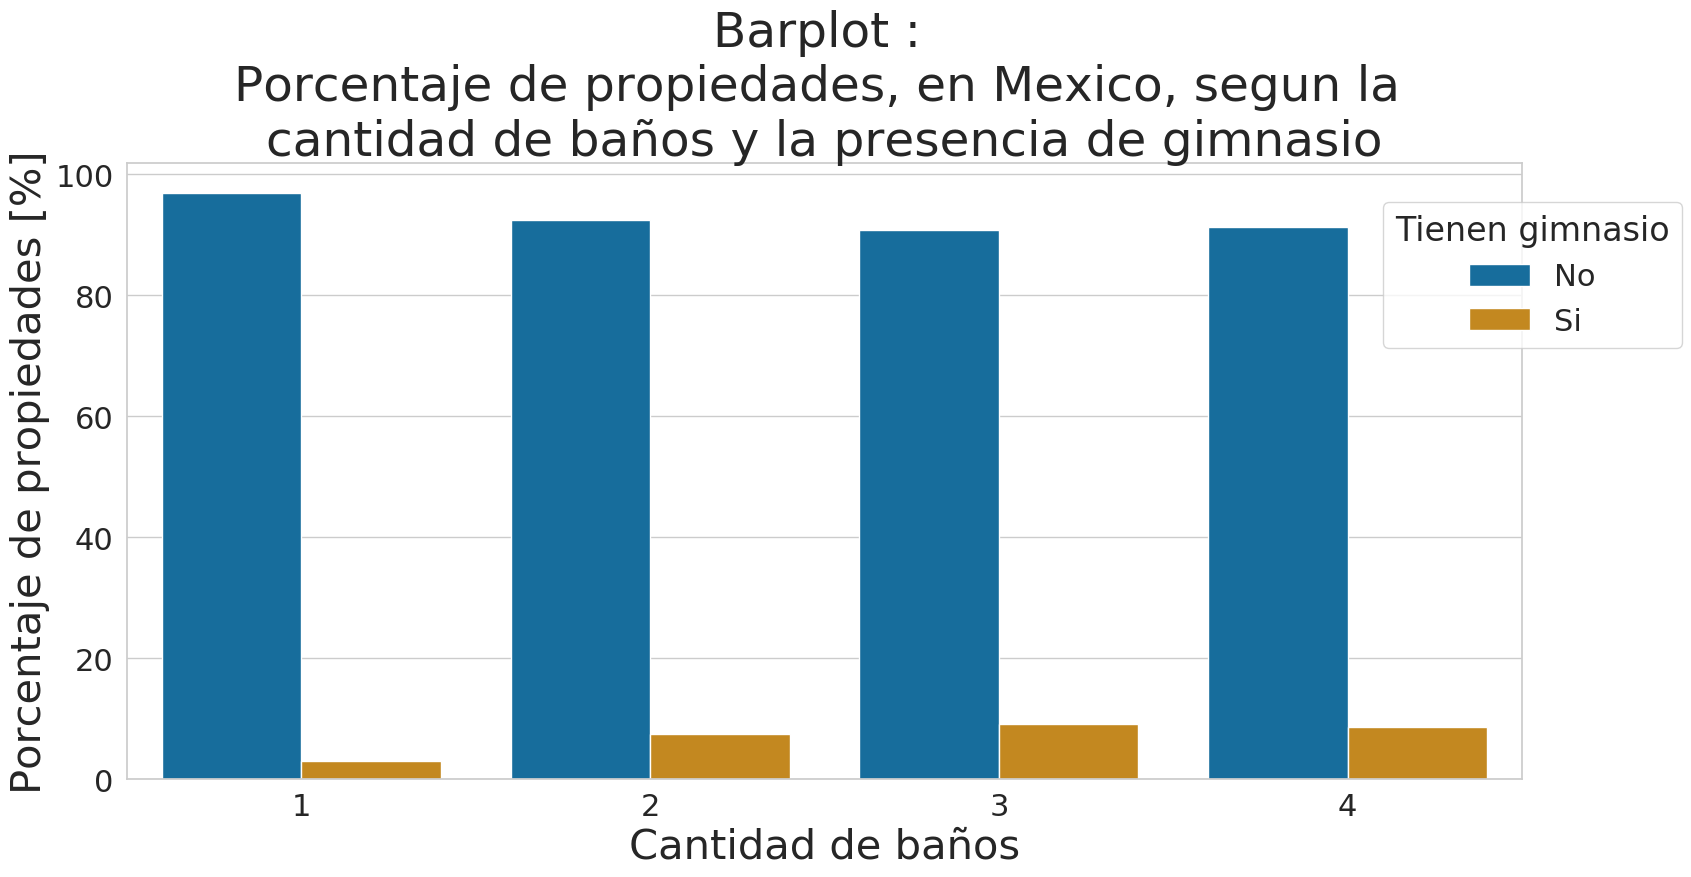

In [50]:
plot_barplot_banos_gimnasio_porcentaje = sns.barplot(
                                            x = 'banos',
                                            y = 'porcentaje_propiedades',
                                            hue = 'tiene_gimnasio',
                                            data = banos_gimnasio_porcentaje_para_plot
                                        )

common.setear_titulos_plot(
    plot_barplot_banos_gimnasio_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños y la presencia de gimnasio',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_gimnasio_porcentaje.legend(title = 'Tienen gimnasio', loc = [0.9, 0.7])

plt.show()

En este grafico se aprecia mas que el porcentaje de propiedades con 1 baños y sin gimnasio es mayor que la 4 baños, por ejemplo.

In [ ]:
varios_plots_banos_gimnasio_porcentaje_apildos = common.plot_stacked_barplot() 

## Banos - Usosmultiples 

###  ¿Que es usosmultiples?

In [51]:
zona_banos['usosmultiples'].unique()

array([False,  True])

In [52]:
zona_banos['usosmultiples'].dtype

dtype('bool')

### ¿Cuantos usosmultiples son NaN?

In [53]:
zona_banos['usosmultiples'].isnull().sum()

0

No perdemos ningun dato mas.

### ¿Cual es el porcentaje de propiedades, en Mexico, segun la cantidad de baños y la presencia de usosmultiples? 

In [54]:
banos_agrupados_usosmultiples_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos, 'banos', 'usosmultiples')
banos_agrupados_usosmultiples_porcentaje.columns = ['banos','tiene_usosmultiples', 'porcentaje_propiedades']
banos_agrupados_usosmultiples_porcentaje

,banos,tiene_usosmultiples,porcentaje_propiedades
0,1,False,97.87
1,1,True,2.13
2,2,False,93.60
3,2,True,6.40
4,3,False,91.59
5,3,True,8.41
6,4,False,91.22
7,4,True,8.78


In [55]:
banos_usosmultiples_porcentaje_para_plot = banos_agrupados_usosmultiples_porcentaje.copy()
banos_usosmultiples_porcentaje_para_plot = common.columna_bool_a_si_no(
                                                banos_usosmultiples_porcentaje_para_plot,
                                                'tiene_usosmultiples'
                                            )
    
banos_usosmultiples_porcentaje_para_plot

,banos,tiene_usosmultiples,porcentaje_propiedades
0,1,No,97.87
1,1,Si,2.13
2,2,No,93.60
3,2,Si,6.40
4,3,No,91.59
5,3,Si,8.41
6,4,No,91.22
7,4,Si,8.78


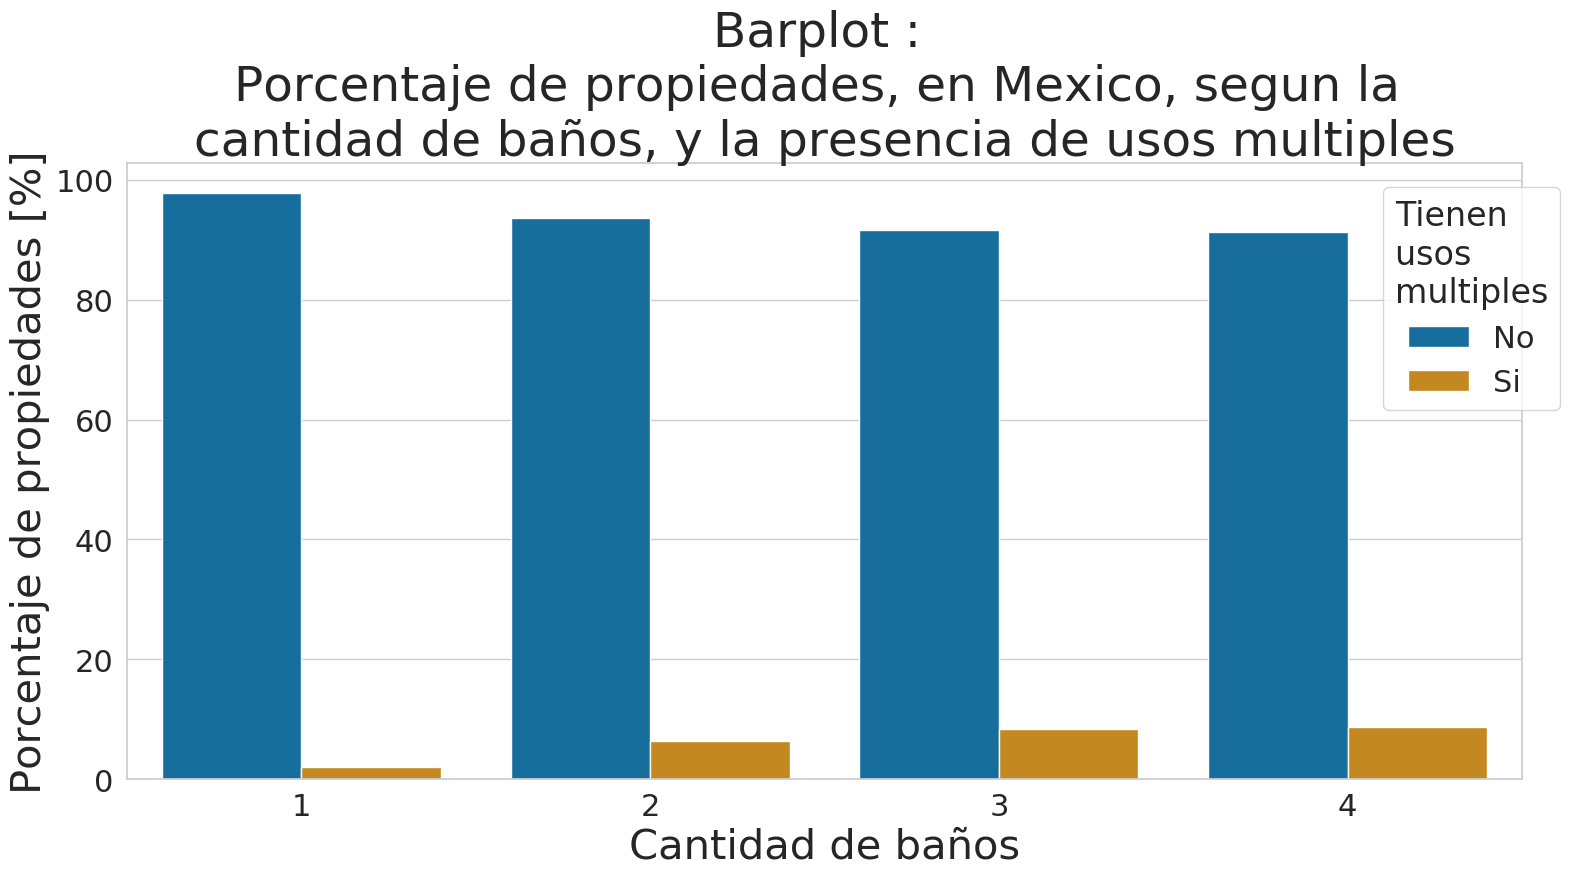

In [56]:
plot_barplot_banos_usosmultiples_porcentaje = sns.barplot(
                                                x = 'banos',
                                                y = 'porcentaje_propiedades',
                                                hue = 'tiene_usosmultiples',
                                                data = banos_usosmultiples_porcentaje_para_plot
                                            )
common.setear_titulos_plot(
    plot_barplot_banos_usosmultiples_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños, y la presencia de usos multiples',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_usosmultiples_porcentaje.legend(title = 'Tienen \nusos \nmultiples', loc = [0.9, 0.6])

plt.show()

## Banos - Piscina 

### ¿Que es piscina? 

In [57]:
zona_banos['piscina'].unique()

array([False,  True])

In [58]:
zona_banos['piscina'].dtype

dtype('bool')

### ¿Cuantas piscina son NaN? 

In [59]:
zona_banos['piscina'].isnull().sum()

0

### ¿Cual es el porcentaje de propidades, en Mexico, segun la cantidad de baños y la presencia de piscina? 

In [60]:
banos_agrupados_piscina_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos, 'banos', 'piscina') 
banos_agrupados_piscina_porcentaje.columns = ['banos', 'tiene_piscina', 'porcentaje_propiedades']
banos_agrupados_piscina_porcentaje

,banos,tiene_piscina,porcentaje_propiedades
0,1,False,96.75
1,1,True,3.25
2,2,False,90.32
3,2,True,9.68
4,3,False,86.65
5,3,True,13.35
6,4,False,86.48
7,4,True,13.52


In [61]:
banos_piscina_porcentaje_para_plot = banos_agrupados_piscina_porcentaje.copy()
banos_piscina_porcentaje_para_plot = common.columna_bool_a_si_no(
                                        banos_piscina_porcentaje_para_plot,
                                        'tiene_piscina'
                                    )
banos_piscina_porcentaje_para_plot

,banos,tiene_piscina,porcentaje_propiedades
0,1,No,96.75
1,1,Si,3.25
2,2,No,90.32
3,2,Si,9.68
4,3,No,86.65
5,3,Si,13.35
6,4,No,86.48
7,4,Si,13.52


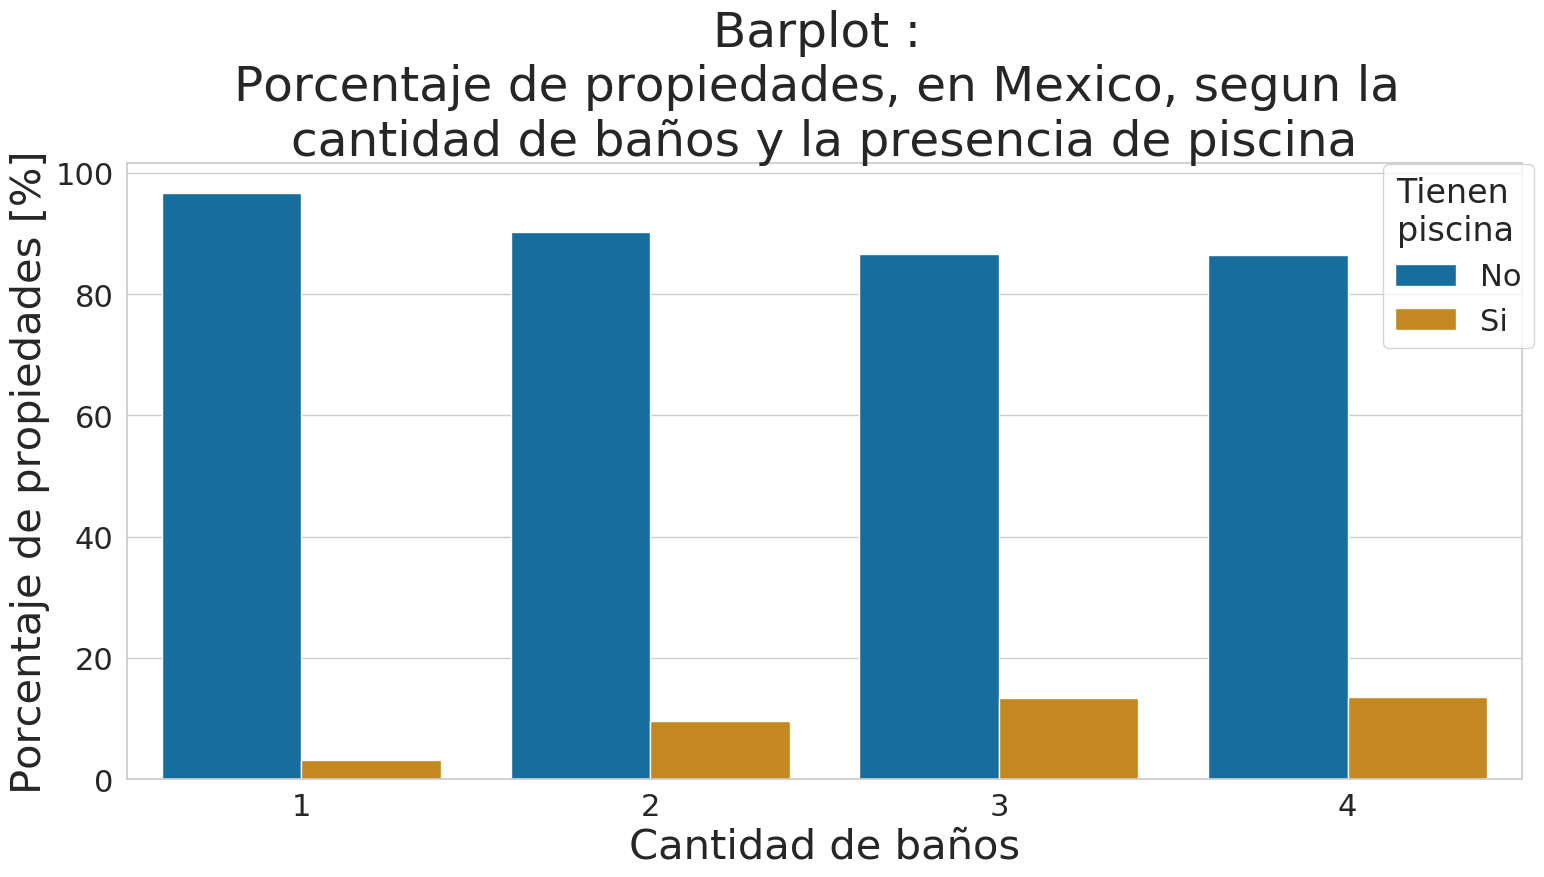

In [62]:
plot_barplot_banos_piscina_porcentaje = sns.barplot(
                                            x = 'banos',
                                            y = 'porcentaje_propiedades',
                                            hue = 'tiene_piscina',
                                            data = banos_piscina_porcentaje_para_plot
                                        )
common.setear_titulos_plot(
    plot_barplot_banos_piscina_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños y la presencia de piscina',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_piscina_porcentaje.legend(title = 'Tienen \npiscina', loc = [0.9, 0.7])

plt.show()

A diferencia de graficos anteriores hay un porcentaje levemente mayor de propiedades con 3 y/o 4 baños y con piscina.

## Banos - Escuelascercanas 

### ¿Que es escuelascercanas?

In [63]:
zona_banos['escuelascercanas'].unique()

array([False,  True])

In [64]:
zona_banos['escuelascercanas'].dtype

dtype('bool')

### ¿Cuantas escuelascercanas son NaN? 

In [65]:
zona_banos['escuelascercanas'].isnull().sum()

0

No perdemos mas datos.

### ¿Cual es el porcentaje de propiedades, en Mexico, segun la cantidad de baños y la presencia de escuelas cercanas? 

In [66]:
banos_agrupados_escuelascercanas_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos, 'banos', 'escuelascercanas')
banos_agrupados_escuelascercanas_porcentaje.columns = ['banos','tiene_escuelascercanas', 'porcentaje_propiedades']
banos_agrupados_escuelascercanas_porcentaje

,banos,tiene_escuelascercanas,porcentaje_propiedades
0,1,False,53.06
1,1,True,46.94
2,2,False,53.06
3,2,True,46.94
4,3,False,54.93
5,3,True,45.07
6,4,False,56.87
7,4,True,43.13


In [67]:
banos_escuelascercanas_porcentaje_para_plot = banos_agrupados_escuelascercanas_porcentaje.copy()
banos_escuelascercanas_porcentaje_para_plot = common.columna_bool_a_si_no(
                                                    banos_escuelascercanas_porcentaje_para_plot,
                                                    'tiene_escuelascercanas'
                                                )
banos_escuelascercanas_porcentaje_para_plot

,banos,tiene_escuelascercanas,porcentaje_propiedades
0,1,No,53.06
1,1,Si,46.94
2,2,No,53.06
3,2,Si,46.94
4,3,No,54.93
5,3,Si,45.07
6,4,No,56.87
7,4,Si,43.13


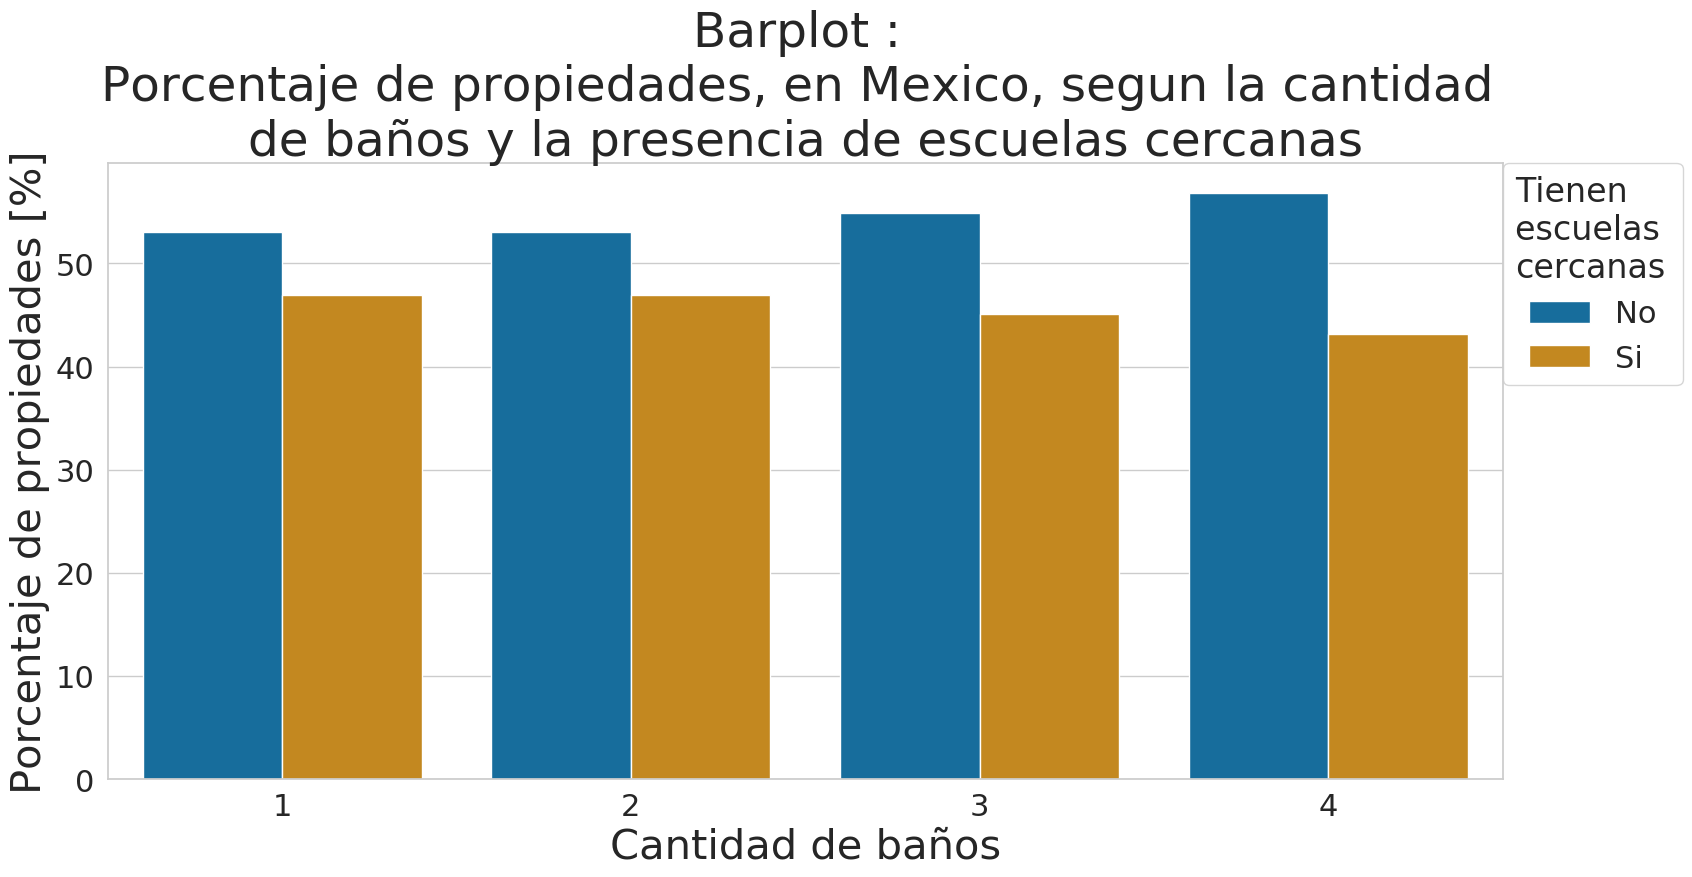

In [68]:
plot_barplot_banos_escuelascercanas_porcentaje = sns.barplot(
                                                    x = 'banos',
                                                    y = 'porcentaje_propiedades',
                                                    hue = 'tiene_escuelascercanas',
                                                    data = banos_escuelascercanas_porcentaje_para_plot
                                                )
common.setear_titulos_plot(
    plot_barplot_banos_escuelascercanas_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la cantidad \nde baños y la presencia de escuelas cercanas',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_escuelascercanas_porcentaje.legend(title = 'Tienen \nescuelas \ncercanas', loc = [1, 0.64])

plt.show()

## Banos - Centroscomercialescercanos 

### ¿Que es centroscomercialescercanos? 

In [69]:
zona_banos['centroscomercialescercanos'].unique()

array([False,  True])

### ¿Cuantos centroscomercialescercanos son NaN?

In [70]:
zona_banos['centroscomercialescercanos'].isnull().sum()

0

No perdemos mas datos.

### ¿Cual es el porcenteja de propiedades, en Mexico, tienen centros comerciales cercanos, segun la cantidad de baños? 

Apply aplica una funcion a toda la serie.  
Transform aplica una funcion a cada elemento de la serie.

In [71]:
banos_agrupados_centroscomercialescercanos_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_banos,'banos', 'centroscomercialescercanos')
banos_agrupados_centroscomercialescercanos_porcentaje.columns = ['banos', 'tiene_centroscomercialescercanos', 'porcentaje_propiedades']
banos_agrupados_centroscomercialescercanos_porcentaje

,banos,tiene_centroscomercialescercanos,porcentaje_propiedades
0,1,False,57.75
1,1,True,42.25
2,2,False,57.79
3,2,True,42.21
4,3,False,60.18
5,3,True,39.82
6,4,False,62.33
7,4,True,37.67


In [72]:
banos_centroscomercialescercanos_porcentaje_para_plot = banos_agrupados_centroscomercialescercanos_porcentaje.copy()
banos_centroscomercialescercanos_porcentaje_para_plot = common.columna_bool_a_si_no(
                                                            banos_centroscomercialescercanos_porcentaje_para_plot,
                                                            'tiene_centroscomercialescercanos'
                                                        )
banos_centroscomercialescercanos_porcentaje_para_plot

,banos,tiene_centroscomercialescercanos,porcentaje_propiedades
0,1,No,57.75
1,1,Si,42.25
2,2,No,57.79
3,2,Si,42.21
4,3,No,60.18
5,3,Si,39.82
6,4,No,62.33
7,4,Si,37.67


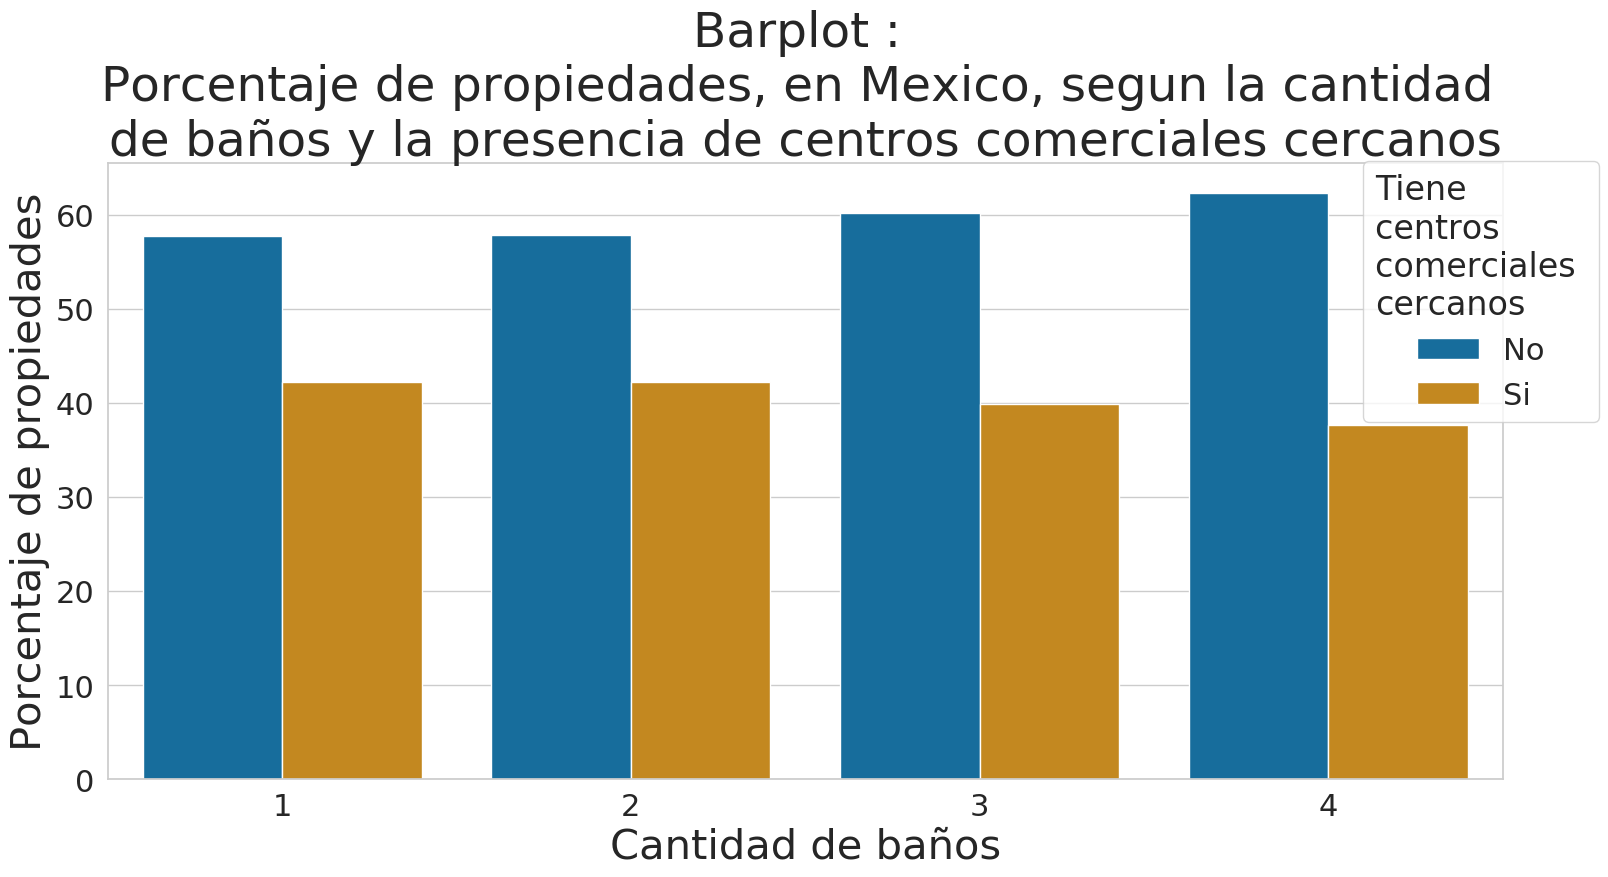

In [73]:
plot_barplot_banos_centroscomercialescercanos = sns.barplot(
                                                    x = 'banos',
                                                    y = 'porcentaje_propiedades',
                                                    hue = 'tiene_centroscomercialescercanos',
                                                    data = banos_centroscomercialescercanos_porcentaje_para_plot
                                                )
common.setear_titulos_plot(
    plot_barplot_banos_centroscomercialescercanos,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la cantidad \nde baños y la presencia de centros comerciales cercanos',
    'Cantidad de baños',
    'Porcentaje de propiedades'
)

plot_barplot_banos_centroscomercialescercanos.legend(
    title = 'Tiene \ncentros \ncomerciales \ncercanos',
    loc = [0.9, 0.58]
)

plt.show()

Tal se podria hacer un "stacked bar chart", luego.

## Banos - Precio 

### ¿Que es precio? 

In [74]:
zona_banos['precio'].unique()

array([2273000., 3600000., 1200000., ..., 1794000., 3386400.,  684338.])

In [75]:
zona_banos['precio'].dtype

dtype('float32')

### ¿Cuantos precio son NaN?

In [76]:
zona_banos['precio'].isnull().sum()

0

No perdemos datos en el analisis de la relacion con este campo.

### ¿Como se distribuye el precio de las propiedades en Mexico, segun la cantidad de baños?

In [77]:
banos_agrupados_precio_estadisticas = common.agrupar_calcular_estadisticas_desagrupar(zona_banos, 'banos', 'precio')
banos_agrupados_precio_estadisticas

,banos,precio_cuantil_1,precio_median,precio_cuantil_3
0,1,"500,000.00","745,000.00","1,200,000.00"
1,2,"1,250,000.00","1,850,000.00","2,900,000.00"
2,3,"1,990,000.00","3,050,000.00","4,800,000.00"
3,4,"2,800,000.00","3,899,500.00","5,620,000.00"


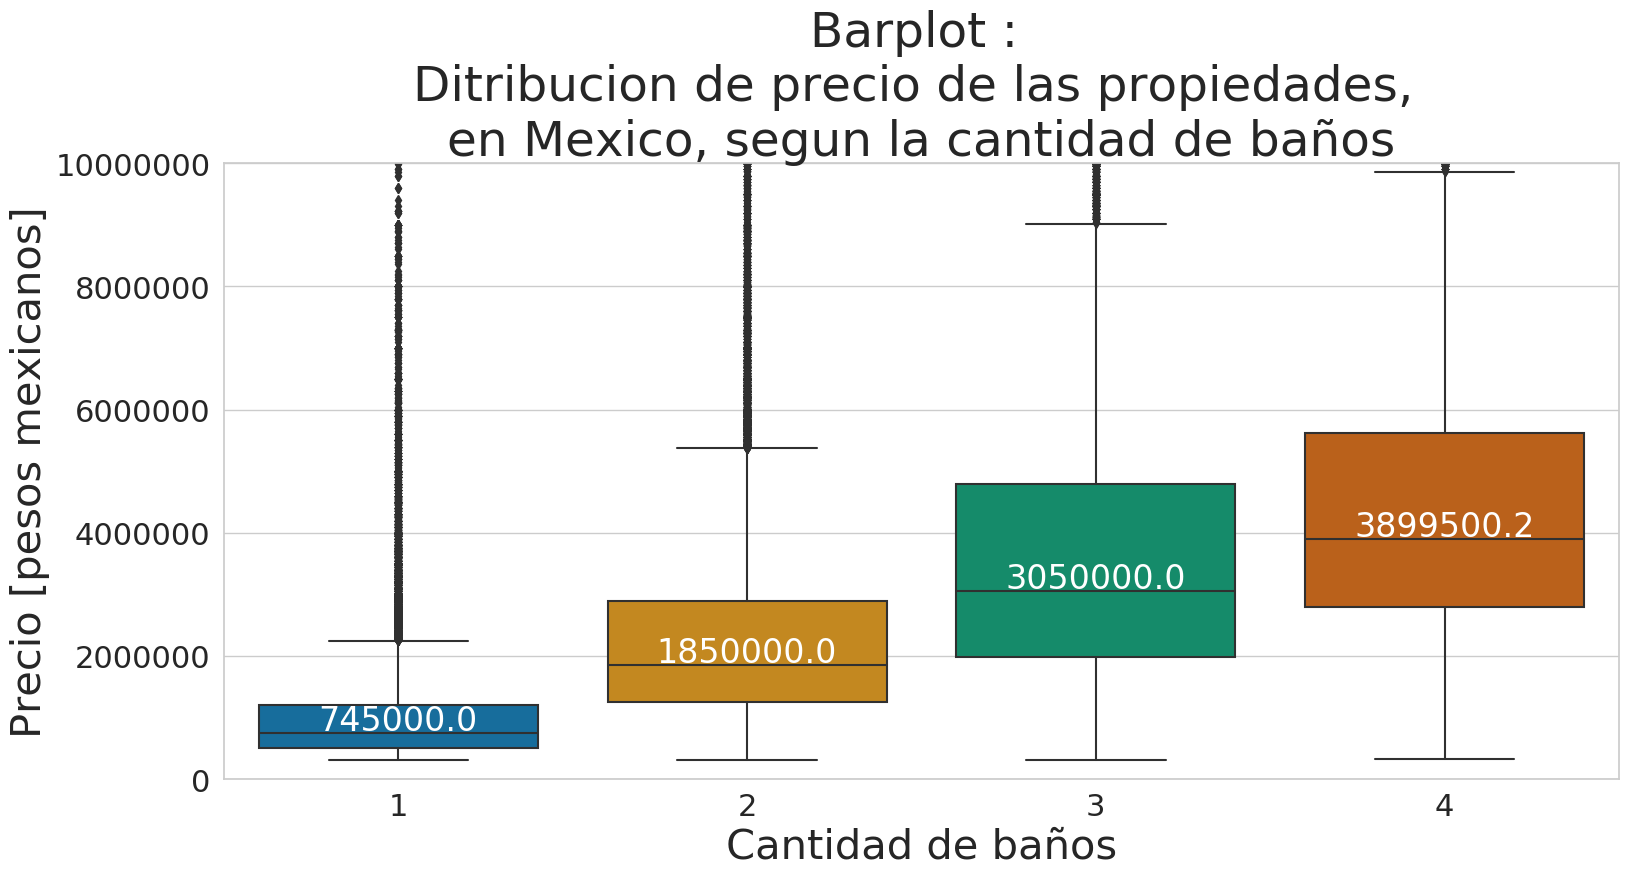

In [78]:
plot_boxplot_banos_precio = sns.boxplot(
                                x = 'banos',
                                y = 'precio',
                                data = zona_banos
                            )
#Titulos
common.setear_titulos_plot(
    plot_boxplot_banos_precio,
    'Barplot : \nDitribucion de precio de las propiedades, \nen Mexico, segun la cantidad de baños',
    'Cantidad de baños',
    'Precio [pesos mexicanos]'
)

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_banos_precio.set_ylim(0,10000000)

# Elimino notacion cientifica del eje y
plot_boxplot_banos_precio.ticklabel_format(style = 'plain', axis = 'y')

common.agregar_serie_plot(
    plot_boxplot_banos_precio,
    banos_agrupados_precio_estadisticas['precio_median'],
    banos_agrupados_precio_estadisticas['precio_median'],
    'w',
    0, 50000
)

plt.show()

#### ¿Cual es la distribucion de precios de las propiedades, en Mexico, segun 1 y 2 baños ? 

In [79]:
banos_1_2_agrupados_precio_estadisticas = banos_agrupados_precio_estadisticas.loc[
                                            banos_agrupados_precio_estadisticas['banos'].isin([1,2])
                                        ]
banos_1_2_agrupados_precio_estadisticas

,banos,precio_cuantil_1,precio_median,precio_cuantil_3
0,1,"500,000.00","745,000.00","1,200,000.00"
1,2,"1,250,000.00","1,850,000.00","2,900,000.00"


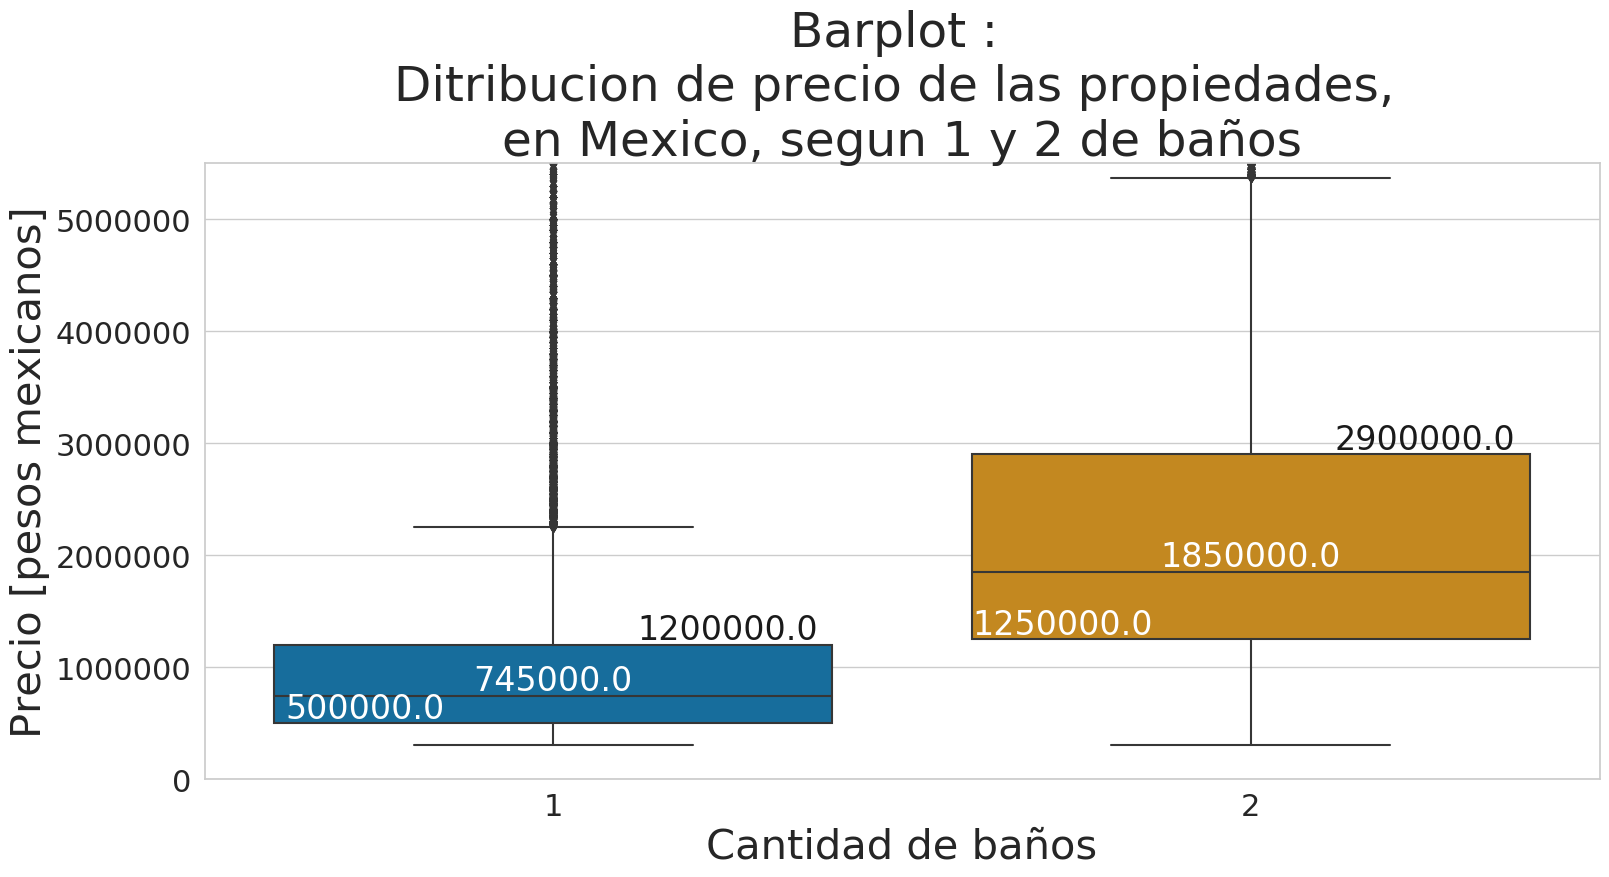

In [80]:
plot_boxplot_banos_1_2_precio = sns.boxplot(
                                x = 'banos',
                                y = 'precio',
                                data = zona_banos.loc[zona_banos['banos'].isin([1,2])]
                            )
#Titulos
common.setear_titulos_plot(
    plot_boxplot_banos_1_2_precio,
    'Barplot : \nDitribucion de precio de las propiedades, \nen Mexico, segun 1 y 2 de baños',
    'Cantidad de baños',
    'Precio [pesos mexicanos]'
)

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_banos_1_2_precio.set_ylim(0,5500000)

# Elimino notacion cientifica del eje y
plot_boxplot_banos_1_2_precio.ticklabel_format(style = 'plain', axis = 'y')

# Agrego cuantiles y medianas
common.agregar_serie_plot(
    plot_boxplot_banos_1_2_precio,
    banos_1_2_agrupados_precio_estadisticas['precio_cuantil_1'],
    banos_1_2_agrupados_precio_estadisticas['precio_cuantil_1'],
    'w',
    -0.27, 50000
)

common.agregar_serie_plot(
    plot_boxplot_banos_1_2_precio,
    banos_1_2_agrupados_precio_estadisticas['precio_median'],
    banos_1_2_agrupados_precio_estadisticas['precio_median'],
    'w',
    0, 50000
)

common.agregar_serie_plot(
    plot_boxplot_banos_1_2_precio,
    banos_1_2_agrupados_precio_estadisticas['precio_cuantil_3'],
    banos_1_2_agrupados_precio_estadisticas['precio_cuantil_3'],
    'k',
    0.25, 50000
)

plt.show()

#### ¿Cual es la distribucion de precio de las propiedades, en Mexico, segun 3 y 4 baños? 

In [81]:
banos_3_4_agrupados_precio_estadisticas = banos_agrupados_precio_estadisticas.loc[
                                            banos_agrupados_precio_estadisticas['banos'].isin([3,4])
                                        ]
banos_3_4_agrupados_precio_estadisticas

,banos,precio_cuantil_1,precio_median,precio_cuantil_3
2,3,"1,990,000.00","3,050,000.00","4,800,000.00"
3,4,"2,800,000.00","3,899,500.00","5,620,000.00"


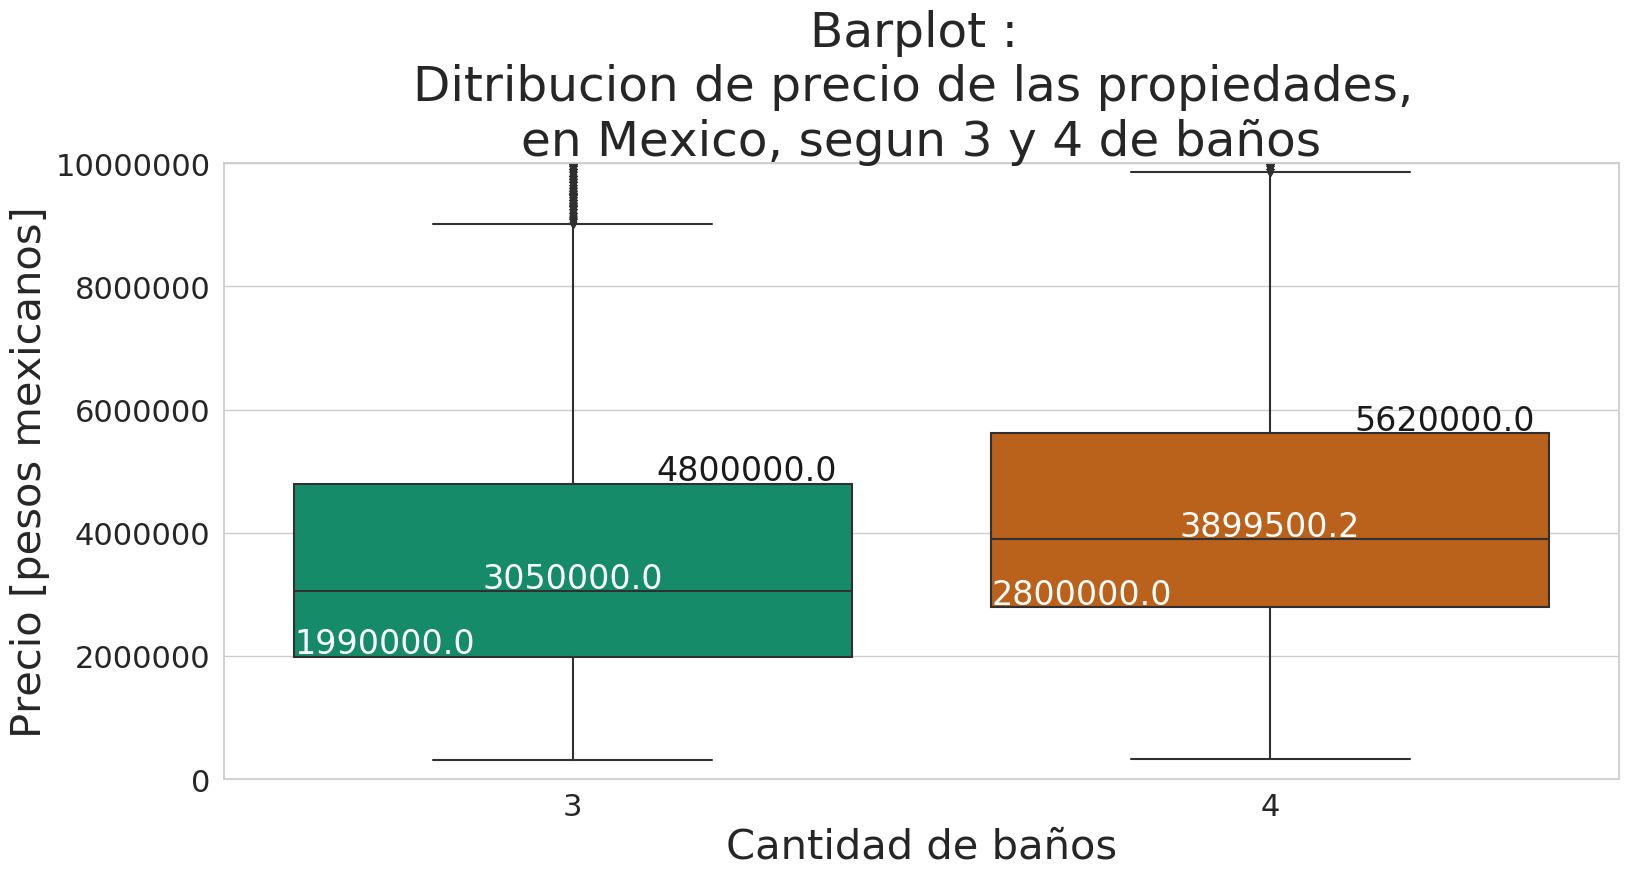

In [82]:
plot_boxplot_banos_3_4_precio = sns.boxplot(
                                x = 'banos',
                                y = 'precio',
                                data = zona_banos.loc[zona_banos['banos'].isin([3,4])],
                                palette = sns.color_palette(COLORES_BARRAS)[2:4]
                            )
#Titulos
common.setear_titulos_plot(
    plot_boxplot_banos_3_4_precio,
    'Barplot : \nDitribucion de precio de las propiedades, \nen Mexico, segun 3 y 4 de baños',
    'Cantidad de baños',
    'Precio [pesos mexicanos]'
)

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_banos_3_4_precio.set_ylim(0,10000000)

# Elimino notacion cientifica del eje y
plot_boxplot_banos_3_4_precio.ticklabel_format(style = 'plain', axis = 'y')

# Agrego cuantiles y medianas
common.agregar_serie_plot(
    plot_boxplot_banos_3_4_precio,
    banos_3_4_agrupados_precio_estadisticas['precio_cuantil_1'],
    banos_3_4_agrupados_precio_estadisticas['precio_cuantil_1'],
    'w',
    -0.27, 50000
)

common.agregar_serie_plot(
    plot_boxplot_banos_3_4_precio,
    banos_3_4_agrupados_precio_estadisticas['precio_median'],
    banos_3_4_agrupados_precio_estadisticas['precio_median'],
    'w',
    0, 50000
)

common.agregar_serie_plot(
    plot_boxplot_banos_3_4_precio,
    banos_3_4_agrupados_precio_estadisticas['precio_cuantil_3'],
    banos_3_4_agrupados_precio_estadisticas['precio_cuantil_3'],
    'k',
    0.25, 50000
)

plt.show()